<a href="https://colab.research.google.com/github/Oluscosco/AI/blob/main/imageSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util


In [9]:
fashion = load_dataset(
	"ashraq/fashion-product-images-small",
	split="train"
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [11]:
fashion

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})

In [12]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

In [13]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

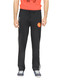

In [14]:
images[3]

In [15]:
model = SentenceTransformer('clip-ViT-B-32')

In [16]:
product_number=0
text_embedding = model.encode([fashion_frame['productDisplayName'][product_number]])
image_embedding=model.encode(images[product_number])

In [17]:
query="blue jeans"
query_embedding = model.encode(query)

In [18]:
cosine = util.cos_sim(image_embedding, text_embedding)

In [19]:
cosine

tensor([[0.3254]])

In [20]:
image_embeddings = model.encode([image for image in images])

In [21]:
results = util.semantic_search(query_embedding, image_embeddings, top_k=10) [0]

In [22]:
results

[{'corpus_id': 36711, 'score': 0.2869890034198761},
 {'corpus_id': 26372, 'score': 0.28497713804244995},
 {'corpus_id': 10125, 'score': 0.28484585881233215},
 {'corpus_id': 11907, 'score': 0.28346070647239685},
 {'corpus_id': 1, 'score': 0.2814236283302307},
 {'corpus_id': 42971, 'score': 0.28113457560539246},
 {'corpus_id': 27889, 'score': 0.28097790479660034},
 {'corpus_id': 13421, 'score': 0.28049910068511963},
 {'corpus_id': 43235, 'score': 0.28045547008514404},
 {'corpus_id': 17844, 'score': 0.27989107370376587}]

In [23]:
def img_search(query, k=10):
	query_embedding = model.encode([query])
	results = util.semantic_search(query_embedding, image_embeddings, top_k=k) [0]
	for r in results:
		display(images[r['corpus_id']])

In [1]:
img_search("black sneakers")

NameError: ignored